### 텍스트 분석

- 텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것입니다.
- 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 비정형 데이터를 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는 것이 매우 중요합니다.
- 텍스트를 word 기반의 다수의 피처로 추출하고 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 벡터값으로 표현될 수 있는데, 이를 피처 벡터화(feature vectorization) 또는 피처 추출(feature extraction)이라 합니다.
- 대표적인 피처 벡터화 변환 방법에는 BOW( bag of words )가 있습니다.

- 텍스트 분석 수행 프로세스
    1. 텍스트 사전 준비작업( 텍스트 전처리 )
        - 클렌징, 대/소문자 변경, 특수문자 및 의미없는 단어 제거, 어근 추출등의 정규화 작업
    2. 피처 벡터화/ 추출 
        - 가공된 텍스트에서 피처를 추출하고 벡터 값 할당 -> BOW ( Count, TF-IDF )
    3. ML 모델 수립 및 학습/ 예측/ 평가
        - 피처 벡터화된 데이터 세트에 ML모델을 적용해 학습/ 예측 및 평가 수행

- 텍스트 분석 패키지
    1. NLTK : 파이썬 대표적인 텍스트 분석 패키지, 수행 속도가 느려 실제 대량의 데이터 기반에서 활용 X
    2. Gensim : 토픽 모델링 구현하는 기능으로 가장 많이 사용되는 패키지
    3. SpaCy : 수행 성능이 뛰어나 많이 사용되는 패키지

#### 텍스트 전처리 ( 정규화 )

- 텍스트 정규화
    1. 클렌징 : 불필요한 문자, 기호등을 사전에 제거하는 작업 ( HTML,XML등 ) 
    2. 텍스트 토큰화 : 문장을 분리하는 문장 토큰화, 문장에서 단어를 토큰으로 분리하는 단어 토큰화
    3. 스톱 워드 제거 : 분석에 큰 의미가 없는 단어 제거
    4. Stemming : 단어의 원형으로 변환 시 일반적인 단어를 적용하거나 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향 ( Porter, Lancaster, Snowball Stemmer )
    5. Lemmatiozation : 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾음 ( WordNetLemmatizer )

##### 문장 토큰화

In [1]:
from nltk import sent_tokenize

text_1 = 'The Matrix is everywhere its all around us, here even in this room. You can see it out your window or on your television. | You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text = text_1)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', '| You feel it when you go to work, or go to church or pay your taxes.']


##### 단어 토큰화

In [2]:
from nltk import word_tokenize

text_2 = 'The Matrix is everywhere its all around us, here even in this room.'
word = word_tokenize(text = text_2)
print(type(word), len(word))
print(word)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import sent_tokenize, word_tokenize

def tokenize(text):
    sentences = sent_tokenize(text)
    word = [ word_tokenize(sentence) for sentence in sentences ]
    return word

word_tokens = tokenize(text_1)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['|', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


##### 스톱 워드 제거

In [4]:
import nltk

In [5]:
print('영어 stop word 개수:', len(nltk.corpus.stopwords.words('english')))

영어 stop word 개수: 179


In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
for sentence in word_tokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()
        
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['|', 'feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


##### Stemming

In [7]:
from nltk import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
fant fanciest


##### Lemmatization

In [8]:
from nltk import WordNetLemmatizer
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

amuse amuse amuse
fancy fancy


- 'v' : 동사
- 'a' : 형용사

#### BOW

- Bag of Words는 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델입니다.
- 장점
    - 쉽고 빠른 구축 가능
- 단점
    - 문맥 의미 반영 부족 : 단어의 순서를 고려하지 않기 대문에 문장 내에서 문맥적인 의미가 무시
    - 희소 행렬 문제 : bow로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 희소 행렬은 ML알고리즘의 수행 시간과 예측 성능을 떨어트림

##### BOW 피처 벡터화

- ML 알고리즘은 숫자형 피처를 데이터로 입력받아 동작하기 대문에 텍스트와 같은 데이터는 숫자형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화라고 합니다.
- 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 피처에 값으로 부여해 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법입니다.
- BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것입니다.

- BOW 종류 
    - 카운트 기반의 벡터화
    - TF-IDF( term frequency - inverse document frequency )기반의 벡터화

- 카운트 기반의 벡터화 
    - 문서에서 해당 단어가 나타는 횟수, count를 부여하는 경우를 카운트 벡터화라고 하며, 카운트 값이 높을수록 중요한 단어로 인식합니다.
    - 하지만 카운트만 부여할 경우 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여합니다.

- TF-IDF 기반의 벡터화
    - 카운트 기반의 벡터화의 단점을 보완하기 위한 것으로, 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서 페널티를 주는 방식으로 값을 부여합니다.

##### 사이킷런의 Count 및 TF-IDF 벡터화 구현 

- 사이킷런의 Count 및 TF-IDF 벡터화 종류
    - CountVectorizer : 카운트 기반의 벡터화를 구현한 클래스로 소문자 일괄 변환, 토큰화, 스톱워드 필터링등의 텍스트 전처리도 함께 수행
        - CountVectorizer 입력 파라미터 
            - max_df : 문서에서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
            - min_df : 문서에서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
            - max_features : 피처의 개수가 높은 빈도를 가지는 단어 순으로 피처 추출해 정수로 값 지정
            - stop_words : 'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
            - n_gram_range : bow 모델의 단어 순서를 보강하기 위해 범위 설정, 튜플 형태로 최소,최댓값 지정
            - analyzer : 피처 추출을 수행한 단위 지정, default는 'word'
            - token_pattern :  토큰화를 수행하는 정규 표현식 패턴을 지정, defalut는 '|b|w|w+|b'로, 공백 또는 개행 문자 등으로 구분된 단어 분리자(|b) 사이의 2문자 이상의 단어를 토큰으로 분리
            - tokenizer : 토큰화를 별도의 사용자 함수로 이용시 적용. CountTokenizer 클래스에서 어근 변환 시 이를 수행하는 별도의 함수를 tokenizer 파라미터에 적용
        

- CountVectorizer를 이용한 피처 벡터화 과정
    1. 사전 데이터 가공 : 모든 문자를 소문자로 변환하는 등의 사전 작업 수행.
    2. 토큰화 : default는 단어 기준( analyzer = True )이며, n_gram_range를 반영하여 토큰화 수행
    3. 텍스트 정규화 : stop words 필터링만 수행, Stemmer, Lemmatize는 외부 함수를 만들거나 패키지로 Text Normalization 수행 필요
    4. 피처 벡터화 : 파라미터를 반영해 token된 단어들을 feature extraction 후 vectorization 적용

##### BOW 벡터화를 위한 희소 행렬


- 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화한다면 대규모 행렬의 대부분의 값을 0이 차지하는 행렬을 가리키는 희소 행렬이 대부분입니다.
- 불필요한 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 연산 시에도 데이터 액세스를 위한 시간이 많이 소모되기 때문에 이러한 희소 행렬이 적은 메모리 공간을 차지할 수 있도록 변환할 수 있는 방법으로 COO, CSR 존재합니다.


- COO 
    - 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장
    - 희소 행렬 변환을 위해서 사이파이( Scipy )의 sparse를 이용해 COO형식으로 수행

In [9]:
import numpy as np

sample = np.array([[3, 0, 1],[0, 2, 0]])
sample

array([[3, 0, 1],
       [0, 2, 0]])

In [10]:
from scipy import sparse

data = np.array([3,1,2])

row = np.array([0, 0, 1])
col = np.array([0, 2, 1])

sparse_coo = sparse.coo_matrix((data, (row, col)))

sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- CSR 형식
    - COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [11]:
from scipy import sparse

sample_2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

data_2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

row_2 = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_2 = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse_coo = sparse.coo_matrix((data_2,(row_2,col_2)))

row_pos = np.array([0, 2, 7, 9, 10 ,12, 13])

sparse_csr = sparse.csr_matrix((data_2,col_2, row_pos))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


#### 텍스트 분류 - 뉴스그룹 분류
- 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측
- 텍스트 기반 분류는 먼저 텍스트를 정규화한 뒤 피처 벡터화를 적용, 이후 ML 알고리즘 적용해 분류를 학습/ 예측/ 평가
- 카운트 기반, TF-IDF 기반의 벡터화 적용해 예측 성능 비교, 피처 벡터화를 위한 파라미터와 GridSearchCV기반의 하이퍼 파라미터 튜닝, 그리고 사이킷런의 Pipeline 객체를 통해 피처 벡터화 파라미터와 GridSearchCV기반의 하이퍼 파라미터튜닝을 한꺼번에 수행

##### 텍스트 정규화

In [12]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset= 'all',random_state=156)

print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [5]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

NameError: name 'news_data' is not defined

In [14]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [15]:
train_news = fetch_20newsgroups(subset='train',remove=('headers','footers','quotes'),random_state=156)
X_train = train_news.data
y_train = train_news.target

In [16]:
test_news = fetch_20newsgroups(subset='test',remove=('headers','footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target

In [17]:
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data),len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


##### 피처 벡터화 변환과 머신러닝 모델 학습/ 예측/ 평가

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
cnt_vect.fit(X_train,y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터텍스트의 CountVectorizer shape:',X_train_cnt_vect.shape)

학습 데이터텍스트의 CountVectorizer shape: (11314, 101631)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CountVectorized Logistic Regression의 예측 정확도는 0.617


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect,y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Logistic Regression의 예측 정확도는 0.678


In [21]:
tfidf_vect = TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect,y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Logistic Regression의 예측 정확도는 0.690


In [22]:
from sklearn.model_selection import GridSearchCV

params = { 'C' : [0.01, 0.1, 1, 5, 10]}
grid_cv = GridSearchCV(lr_clf, param_grid = params, cv=3, scoring='accuracy', verbose = 1)
grid_cv.fit(X_train_tfidf_vect,y_train)
print('Logistic Regression best C parameter :', grid_cv.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.9min finished


Logistic Regression best C parameter : {'C': 10}


In [23]:
pred = grid_cv.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


##### 파이프라인 사용 및 GridSearchCV와의 결합

In [24]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf_vect',TfidfVectorizer(stop_words='english', ngram_range=(1,2),max_df=300)),
                     ('lr_clf',LogisticRegression(C=10))])

In [25]:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regressor의 예측 정확도 {0:.3f}'.format(accuracy_score(y_test,pred)))

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline을 통한 Logistic Regressor의 예측 정확도 0.704


In [26]:
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100,200, 300],
           'lr_clf__C': [1,5,10]
}

grid_cv = GridSearchCV(pipeline, param_grid = params, cv = 3, scoring='accuracy',verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_, grid_cv.best_score_)

pred = grid_cv.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 16.5min finished


{'lr_clf__C': 10, 'tfidf_vect__max_df': 200, 'tfidf_vect__ngram_range': (1, 2)} 0.755524129397207
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.700


#### 감성 분석

- 주관적인 감성/ 의견/ 감정 기분등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용됩니다.
- 문서 내 텍스트가 나타내는 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하여 긍정/부정을 결정합니다.
- 지도학습 기반 감성 분석 : 학습 데이터, 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이르 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 텍스트 기반의 분류와 거의 동일합니다.
- 비지도학습 기반 감성 분석 : 'Lexicon'이라는 일종의 감성 어휘 사전을 이용합니다. 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단합니다.

##### 지도학습 기반 감성 분석

In [6]:
review_df = pd.read_csv('labeledTrainData.tsv',sep='\t',header=0, quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


- id : 각 데이터의 id
- sentiment : 영화평의 sentiment 결과 값(target label). 1은 긍정적 평가, 0은 부정적 평가
- review : 영화평의 텍스트

In [7]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
review_df['review'] = review_df['review'].str.replace('<br />',' ')
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.  Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.  The actual feature film bit when it finally starts is only on for 2

In [9]:
import re
review_df['review'] = review_df['review'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
print(review_df['review'][0])

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for  

In [10]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline([('cnt_vect',CountVectorizer(stop_words='english',ngram_range=(1,2) )),
                     ('lr_clf',LogisticRegression(C=10))])

pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print(' 예측 정확도는 {0:.3f}, ROC_AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),roc_auc_score(y_test,pred_probs)))

 예측 정확도는 0.886, ROC_AUC는 0.9503


In [12]:
pipeline = Pipeline([('tfidf_vect',TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf',LogisticRegression(C=10))])

pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_proba = pipeline.predict_proba(X_test['review'])[:,1]
print(' 예측 정확도는 {0:.3f}, ROC_AUC는 {1:.4f}'.format(accuracy_score(y_test,pred), roc_auc_score(y_test,pred_proba)))

 예측 정확도는 0.894, ROC_AUC는 0.9598


##### 비지도하습 기반 감성 분석

- 지도학습 기반 감성 분석은 데이터 세트가 레이블 값을 가지고 있지만 많은 경우 이러한 결정된 레이블 값을 가지고 있지 않습니다. 이러한 경우 감성의 긍정, 부정의 정도를 의미하는 감성만을 분석하기 위해 지원하는 감성 어휘 사전인 'Lexicon'이 유용하게 사용될 수 있습니다.
- 감성 사전을 구현한 패키지로 NLTK가 있으며, Lexicon모듈도 포함돼 있습니다.
- 감성 사전을 더 상세히 이해하기 위해 NLP 패키지의 WordNet는 영어 어휘 사전으로 시맨틱 분석을 제공합니다. 또한, 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사로 구성된 개별 단어를 Synet이라는 개념을 이용해  표현합니다.
- 하지만 NLTK의 감성 사전이 감성에 대한 사전 역할을 제공한 장점은 맞지만, 예측 성능이 좋지 못하다는 단점이 있습니다.

- NLTK를 포함한 대표적인 감성 사전
    - SentiWordNet : WordNet과 유사하게 감성 단어 전용의 WordNet을 구현, WordNet의 Synset 개념을 감성 분석에 적용한 것으로 긍정, 부정, 객관성 지수가 포함
    - VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지, 뛰어난 성능과 수행 시간을 보장
    - Pattern : 예측 성능 측면에서 주목받는 패키지

###### SentiWordNet
- SentiWordNet은 WordNet 기반의 synset을 이용하므로 synset에 대한 개념을 이해해야 합니다.

In [13]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\SANGMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\SANGMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\SANGMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\SANGMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\SANGMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     

True

In [14]:
from nltk.corpus import wordnet as wn

term = 'present'


In [15]:
synsets = wn.synsets(term)

print('synset() 반환 type :', type(synsets))
print('synset() 반환 값 개수:', len(synsets))
print('synset() 반환 값 개수 : ', synsets) # present는 의미, n은 명사, 01은 명사로서 가지는 의미를 구분하는 인덱스

synset() 반환 type : <class 'list'>
synset() 반환 값 개수: 18
synset() 반환 값 개수 :  [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [16]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :', synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [17]:
# WordNet은 어휘간의 관계를 유사도로 나타낼 수 있습니다.

tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

In [18]:
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)

In [19]:
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [20]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(list(swn.senti_synsets('slow')))
print('senti_synsets() 반환 type : ',type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값 :',senti_synsets)

senti_synsets() 반환 type :  <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [21]:
father = swn.senti_synset('father.n.01')
excellent = swn.senti_synset('excellent.a.01')

print('father 긍정 감성 지수:',father.pos_score())
print('father 부정 감성 지수:',father.neg_score())
print('father 객관성 지수:',father.obj_score())
print('\n')
print('excellent 긍정 감성 지수:',excellent.pos_score())
print('excellent 부정 감성 지수:',excellent.neg_score())

father 긍정 감성 지수: 0.0
father 부정 감성 지수: 0.0
father 객관성 지수: 1.0


excellent 긍정 감성 지수: 1.0
excellent 부정 감성 지수: 0.0


###### SentiWordNet을 이용한 영화 감상평 감성 분석


- 감성분석 과정
    - 문서를 문장단위로 분해
    - 문장을 단어 단위로 토큰화하고 품사 태깅
    - 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
    - Senti_synset에서 긍정/부정 지수를 구해 모두 합산해서 임계치 값 이상일 때 긍정/ 부정 감성 결정

In [22]:
# 품사 태깅하는 내부 함수
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
     
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
     
    for raw_sentence in raw_sentences:
         
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            
             
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    if sentiment >= 0 :
        return 1
    
    return 0

In [24]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print('#### SentiWordNet 예측 성능 평가 ####')
print(confusion_matrix( y_target, preds))
print("정확도:", accuracy_score(y_target , preds))
print("정밀도:", precision_score(y_target , preds))
print("재현율:", recall_score(y_target, preds))

#### SentiWordNet 예측 성능 평가 ####
[[7668 4832]
 [3636 8864]]
정확도: 0.66128
정밀도: 0.647196261682243
재현율: 0.70912


###### VADER를 이용한 감성 분석

- SentimentIntensityAnalyzer클래스를 이용

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)
# neg : 부정, neu : 중립, pos : 긍정, compound : neg, neu, pos score를 조합해 -1 ~ 1 사이의 감성 지수 표현한 수치

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [35]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x,0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER Evaluation ####')
print('오차행렬\n',confusion_matrix( y_target, vader_preds))
print("정확도:", accuracy_score(y_target , vader_preds))
print("정밀도:", precision_score(y_target , vader_preds))
print("재현율:", recall_score(y_target, vader_preds))

#### VADER Evaluation ####
오차행렬
 [[ 6736  5764]
 [ 1867 10633]]
정확도: 0.69476
정밀도: 0.6484722815149113
재현율: 0.85064


#### 문서 군집화 소개와 실습 ( opinion review 데이터 세트를 이용한 문서 군집화 수행 )

- 문서 군집화
    - 비슷한 텍스트 구성의 문서를 군집화하는 것으로 텍스트 분류 기반의 문서 분류와 유사하지만 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작합니다.
    

In [4]:
import pandas as pd
import glob, os

path = 'C:/Users/SANGMIN/git/머신러닝/Untitled Folder/topics'

all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

In [5]:
for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
df = pd.DataFrame({'filename' : filename_list, 'opinion_text' : opinion_text})
df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


##### Lemmatization을 위한 함수 생성

In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string


remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

##### TF-IDF 피처 벡터화, TfidfVectorizer에서 피처 벡터화 수행 시 Lemmatization을 적용하여 토큰화

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2), min_df=0.05,max_df= 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


##### 5개의 군집으로 k-means 군집화

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0)
kmeans.fit(feature_vect)
kmeans_label = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

##### 3개의 군집으로 k-means 군집화

In [37]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

##### 군집화된 그룹별로 데이터 확인

In [38]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",1
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",0


In [39]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc...",0
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2...",0
5,buttons_amazon_kindle,I thought it would be fitting to christen ...,0
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken ...,0
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a ...,0
10,eyesight-issues_amazon_kindle,It feels as easy to read as the K1 but doe...,0
11,features_windows7,"I had to uninstall anti, virus and selecte...",0
12,fonts_amazon_kindle,Being able to change the font sizes is aw...,0


In [40]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and...",1
13,food_holiday_inn_london,The room was packed to capacity with queu...,1
14,food_swissotel_chicago,The food for our event was deli...,1
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it i...,1
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal ...",1
21,location_holiday_inn_london,Great location for tube and we crammed in...,1
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is ...,1
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice...",1
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...",1
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...",1


In [41]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car its...",2
7,comfort_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...,2
17,interior_honda_accord_2008,I love the new body style and the interior...,2
18,interior_toyota_camry_2007,"First of all, the interior has way too ma...",2
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and look...",2
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",2
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ...,2
37,seats_honda_accord_2008,Front seats are very uncomfor...,2
47,transmission_toyota_camry_2007,"After slowing down, transmission has to b...",2


In [42]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label


##### 군집별 중요 단어 추출

In [43]:
cluster_centers = kmeans.cluster_centers_
print('cluster_centers shape : ',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape :  (5, 2409)
[[0.         0.         0.00676386 ... 0.         0.         0.        ]
 [0.02880332 0.         0.         ... 0.         0.         0.00208647]
 [0.01490253 0.         0.         ... 0.         0.         0.00606841]
 [0.         0.00209644 0.00106183 ... 0.0040101  0.00430047 0.        ]
 [0.         0.00137309 0.         ... 0.         0.         0.        ]]


In [44]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details


In [45]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'life', 'battery life', 'keyboard', 'kindle', 'size', 'button', 'easy', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'location', 'staff', 'food', 'clean', 'bathroom', 'parking', 'room wa']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'car', 'gas', 'transmission', 'gas mileage', 'ride', 'comfort']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord

#### 문서 유사도

- 문서와 문서 간의 유사도 비교는 코사인 유사도를 사용

In [64]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['My name is jeon sang min, and 27 years old' ,
            'My name is jeon sang jun, and 30 years old',
            'My name is jeon sun gu, and 59 years old, my wife name is Lim dong sim']

tfidf = TfidfVectorizer()
tfidf_sample = tfidf.fit_transform(doc_list)

print(tfidf_sample.shape)

(3, 19)


In [73]:
tfidf_vect_dense = tfidf_sample.todense()

vect1 = np.array(tfidf_vect_dense[0]).reshape(-1,)
vect2 = np.array(tfidf_vect_dense[1]).reshape(-1,)

print (' 문장 1, 2의 유사도 : ', cos_similarity(vect1,vect2))

 문장 1, 2의 유사도 :  0.6016087972062392


In [74]:
vect1 = np.array(tfidf_vect_dense[0]).reshape(-1,)
vect3 = np.array(tfidf_vect_dense[2]).reshape(-1,)

print(' 문장1, 3의 유사도 : ', cos_similarity(vect1, vect3))

 문장1, 3의 유사도 :  0.438923421417688


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_sample[0],tfidf_sample)

array([[1.        , 0.6016088 , 0.43892342]])

In [80]:
cosine_similarity(tfidf_sample,tfidf_sample)

array([[1.        , 0.6016088 , 0.43892342],
       [0.6016088 , 1.        , 0.43892342],
       [0.43892342, 0.43892342, 1.        ]])

##### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [101]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = 'C:/Users/SANGMIN/git/머신러닝/Untitled Folder/topics'
all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [105]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('비교 기준 문서명 : ', comparison_docname,'와 타 문서 유사도')
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
비교 기준 문서명 :  bathroom_bestwestern_hotel_sfo 와 타 문서 유사도
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


[[10  8  9 13  7 12 11  5  4  1 15 14  2  6  3]]
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

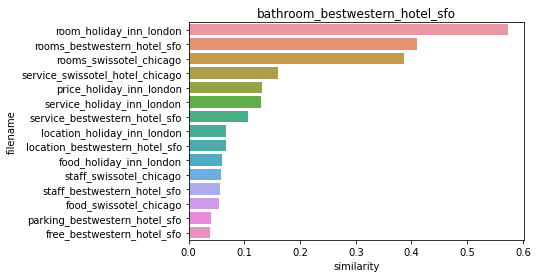

In [108]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 

sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

[[10  8  9 13  7 12 11  5  4  1 15 14  2  6  3]]
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

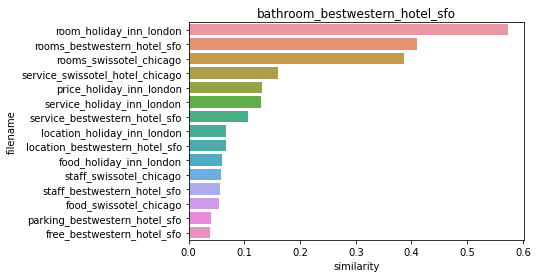

In [119]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)